In [1]:
import time
import hydroeval as he
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, './CFE')
import bmi_cfe_open
import bmi_cfe_enkf_peturb
#import bmi_cfe_peturb

sys.path.insert(0, './Assimilation')
import Bmi_da_ENKF_forSBMI

#sys.path.append('/home/jovyan/data/NextGen---The-Simulators-/USGS/USGS_BMI_FT/cleaned_FT')
sys.path.append('../USGS/USGS_BMI_FT')
import bmi_usgs

#new bmi_cfe is CFE open and cfe peturb

In [2]:
print(bmi_cfe_open)
#print(bmi_cfe_peturb)
print(bmi_cfe_enkf_peturb)
print(Bmi_da_ENKF_forSBMI)
print(bmi_usgs)


<module 'bmi_cfe_open' from 'C:\\Users\\zjbut\\Documents\\GitHub\\NextGen---The-Simulators-\\Toy_Model\\./CFE\\bmi_cfe_open.py'>
<module 'bmi_cfe_enkf_peturb' from 'C:\\Users\\zjbut\\Documents\\GitHub\\NextGen---The-Simulators-\\Toy_Model\\./CFE\\bmi_cfe_enkf_peturb.py'>
<module 'Bmi_da_ENKF_forSBMI' from 'C:\\Users\\zjbut\\Documents\\GitHub\\NextGen---The-Simulators-\\Toy_Model\\./Assimilation\\Bmi_da_ENKF_forSBMI.py'>
<module 'bmi_usgs' from 'C:\\Users\\zjbut\\Documents\\GitHub\\NextGen---The-Simulators-\\Toy_Model\\../USGS/USGS_BMI_FT\\bmi_usgs.py'>


In [3]:
## Open BMI's for each file
# cfe_open = bmi_cfe.BMI_CFE()
# cfe_peturbed = bmi_cfe_peturb.BMI_CFE()
# cfe_analysis = bmi_cfe_statevars.BMI_CFE() #true model in the end with updated state vars

cfe_open = bmi_cfe_open.BMI_CFE()
cfe_peturbed = bmi_cfe_enkf_peturb.BMI_CFE()
cfe_analysis = bmi_cfe_enkf_peturb.BMI_CFE() #true model in the end with updated state vars
#cfe_analysis = bmi_cfe_statevars_et.BMI_CFE(

enkf = Bmi_da_ENKF_forSBMI.EnKF_wrap()
usgs = bmi_usgs.BMI_USGS()

In [4]:
## Initialize the BMI's
#cfe_open.initialize(cfg_file='./CFE/cat_58_config_cfe.json')
#cfe_peturbed.initialize(cfg_file='./CFE/cat_58_config_cfe_peturb_model.json')
#cfe_analysis.initialize(cfg_file='./CFE/cat_58_config_cfe.json') # I am confused what this config file should look like

# make one bmi for all of this and options in config file

# ## Case study files
cfe_open.initialize(cfg_file='./CFE/config_cfe_peturb_model_CT_calibration.json')
cfe_peturbed.initialize(cfg_file='./CFE/config_cfe_peturb_model_CT_calibration.json')
cfe_analysis.initialize(cfg_file='./CFE/config_cfe_peturb_model_CT_calibration.json')

enkf.initialize(cfg_file='./Assimilation/EnKF_config.json') # Need to create this still
usgs.initialize(cfg_file='../USGS/USGS_BMI_FT/usgs_config.json')



initialized 84.21526
                         Date     Flow  validity
0   2017-05-15 04:00:00+00:00  166.500       1.0
1   2017-05-15 05:00:00+00:00  161.000       1.0
2   2017-05-15 06:00:00+00:00  156.750       1.0
3   2017-05-15 07:00:00+00:00  151.500       1.0
4   2017-05-15 08:00:00+00:00  148.750       1.0
..                        ...      ...       ...
763 2017-06-15 23:00:00+00:00   28.400       1.0
764 2017-06-16 00:00:00+00:00   28.175       1.0
765 2017-06-16 01:00:00+00:00   28.400       1.0
766 2017-06-16 02:00:00+00:00   27.500       1.0
767 2017-06-16 03:00:00+00:00   27.500       1.0

[768 rows x 3 columns]
USGS station ID 01123000


                time  APCP_surface  RAINRATE      T2D       Q2D     U2D  \
0     5/15/2017 0:00           0.0       0.0  284.078  0.006616  6.0804   
1     5/15/2017 1:00           0.0       0.0  283.180  0.006650  6.0304   
2     5/15/2017 2:00           0.0       0.0  282.440  0.006614  5.9856   
3     5/15/2017 3:00           0.0       0.0  281.662  0.006476  5.9402   
4     5/15/2017 4:00           0.0       0.0  281.702  0.006530  6.3688   
..               ...           ...       ...      ...       ...     ...   
763  6/15/2017 19:00           0.0       0.0  295.270  0.007334 -1.1600   
764  6/15/2017 20:00           0.0       0.0  294.610  0.006788 -1.2230   
765  6/15/2017 21:00           0.0       0.0  293.624  0.006776 -1.2812   
766  6/15/2017 22:00           0.0       0.0  292.722  0.006714 -1.5682   
767  6/15/2017 23:00           0.0       0.0  291.554  0.006650 -1.8486   

        V2D       PSFC   SWDOWN   LWDOWN  
0   -1.9670   98376.98    0.000  318.822  
1   -2.0740  

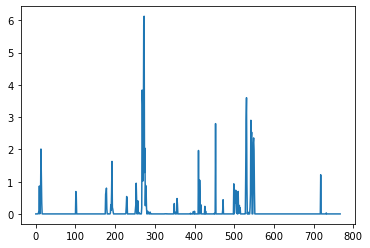

In [5]:
with open(cfe_open.forcing_file, 'r') as f:
    df_forcing = pd.read_csv(f)
    
print(df_forcing)
plt.plot(df_forcing['APCP_surface'])

values = df_forcing['APCP_surface']
print(values)

In [6]:
#Originial Version 
# basian coupling numerical error:
# the distrbutions are not well calibrated
# valibrate the model
# calibrate the pert
# set b matrix right: cov matrix in the peterbations.
# 2x2 matrix
# ground_water_storage_m 
# ground_water_storage_m <



#Make empty matrices for plotting
cfeOpen = []
cfePeturbed = []
cfeAnalysis = []
cfeEnKF = []
cfe_def = []

## Loop through time. Set values for each model and get values
for i, precip in enumerate(df_forcing['APCP_surface']): #i is RAINRATE

    # Set values for each model
    cfe_open.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip*0+6) #value of precip from forcing data in loop
    cfe_peturbed.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip*0+6)
    cfe_analysis.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip*0+6)
    
    # Update usgs data and get value to put into EnKF
    usgs.update()
    obs = np.array(usgs.get_value('Flow')) #need array for EnKf function. should get this when initialize. CFS 
    #obs_m = (obs * 3.281**3) #converting cfs to m3/s
    #print(obs_m)
    validity=usgs.get_value('validity')[i]
    print("-------------------------------------------------")
    print("validity",validity)

    # Update CFE open and peturbed. Get value for peturbed stats. 
    cfe_open.update()
    cfe_peturbed.update()
    
    # Get state variables originial values from CFE Analysis to update in enkf
    # Get state vars from Peturbed. These are values as enkf uses
    soil_storage_avail = cfe_peturbed.get_value('soil_storage_avail_m')
    soil_reservoir_storage_deficit = cfe_peturbed.get_value('soil_reservoir_storage_deficit_out_m')
    cfe_def.append(soil_reservoir_storage_deficit)
    storage_max_m= cfe_peturbed.get_value("storage_max_out_m")
    print(storage_max_m)
    
    print("DEF!!",cfe_peturbed.get_value("soil_reservoir_storage_deficit_out_m"))
    surface_runoff = cfe_peturbed.get_value('land_surface_water__runoff_volume_flux')
    # if surface_runoff>0:
    #     print("surface_runoff",surface_runoff)
    # Get values for plotting
    outflow = cfe_open.get_value('land_surface_water__runoff_depth') #m3/s
    cfeOpen.append(outflow) #for plotting
    outflow_peturb = cfe_peturbed.get_value('land_surface_water__runoff_depth_ens')
    
    # Get mean and covariance for stats of ensemble runs for EnKF
    outflow_peturb_mean = np.mean(outflow_peturb)
    outflow_peturb_covar = np.cov(outflow_peturb)
    #print("mean", outflow_peturb_mean)
    #print("covar", outflow_peturb_covar)
    cfePeturbed.append(outflow_peturb_mean) #for plotting
    # print(usgs.get_value('validity')[0])


    # Set EnKF value to usgs, mean, and covariance. Get value from it then
    enkf.set_value('soil_storage_avail_m', soil_storage_avail) #setting soil storage in enkf
    enkf.set_value('soil_reservoir_storage_deficit_m', soil_reservoir_storage_deficit) #setting soil storage in enkf
    enkf.set_value('surface_runoff_depth_m', surface_runoff) #setting soil storage in enkf   
    enkf.set_value('storage_max_m',storage_max_m)
    print("enkf.set_value('storage_max_m',storage_max_m)")
    enkf.set_value('x', np.array([outflow_peturb_mean]))
    enkf.set_value('P', np.array([outflow_peturb_covar]))
    enkf.set_value('z', np.array([obs[i]]))
    enkf_validity=enkf.set_value('validity',validity)
    enkf.update()


    #For plotting############################# after this
    outflow_enkf = enkf.get_value('enkf')
    cfeEnKF.append(outflow_enkf)

    state_transition_soil_storage = enkf.get_value('soil_storage_avail_m')
    state_transition_soil_res     = enkf.get_value('soil_reservoir_storage_deficit_updated_m')
    # state_transition_runoff       = enkf.get_value('surface_runoff_depth_updated_m')
    state_transition_runoff_factor= enkf.get_value('surface_runoff_ratio')
    # print("Updated deficit",state_transition_soil_res)


#     # Set value for CFE analysis based on the state variable change from the EnKF factor tog et true streamflow
    cfe_analysis.set_value('soil_storage_avail_m', state_transition_soil_storage) #look up value from lookup table based on EnKF factor   
    cfe_analysis.set_value('soil_reservoir_storage_deficit_m', state_transition_soil_res) #look up value from lookup table based on EnKF factor   
    # cfe_analysis.set_value('DIRECT_RUNOFF', state_transition_runoff) 
    cfe_analysis.set_value('state_var_change_runoff',state_transition_runoff_factor)

    cfe_analysis.update() #get new streamflow value based on state var change
    # set them in to pert
    outflow_analysis = cfe_analysis.get_value('land_surface_water__runoff_depth')
    cfeAnalysis.append(outflow_analysis) #for plotting
        
     # Update final model from value of analysis
    cfe_updated_everything_soil_storage = cfe_analysis.get_value('soil_storage_avail_m')
    cfe_updated_everything_soil_res = cfe_analysis.get_value('soil_reservoir_storage_deficit_m')
    print("should be Updated deficit",cfe_updated_everything_soil_res)
    cfe_updated_everything_runoff = cfe_analysis.get_value('state_var_change_runoff')

    cfe_peturbed.set_value('soil_storage_avail_m', cfe_updated_everything_soil_storage)
    cfe_peturbed.set_value('soil_reservoir_storage_deficit_m', cfe_updated_everything_soil_res)
    cfe_peturbed.set_value('state_var_change_runoff', cfe_updated_everything_runoff)
    # cfe_peturbed.update()
 
# # Finalize models
cfe_open.finalize(print_mass_balance=True)
cfe_peturbed.finalize(print_mass_balance=True)
cfe_analysis.finalize(print_mass_balance=True)
usgs.finalize()
enkf.finalize()

-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.33997484961299995
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.33997484961299995
EnKF Code predicted, X Post [166.51741975]
***********under estimaiton ratio [4.75079743]
Observation BMI [166.5]
CFE [35.05041466]
enkf [166.51741975]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.09183353053238519
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.09183353053238519
EnKF Code predicted, X Post [161.24896782]
surface_runoff_ratio [171.56939322]
Leftover vol 0.0
surface _runoff [171.56939322]
***********over estimaiton ratio [1.]
Observation BMI [161.]
CFE [206.08701037]
enkf [161.24896782]
should be Updated deficit [0.02419722]
--------------------------------------------

***********over estimaiton ratio [0.83266865]
Observation BMI [101.75]
CFE [122.12007088]
enkf [101.68555444]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [100.14569898]
surface_runoff_ratio [59.99954768]
Leftover vol [36.31211521]
surface _runoff [59.99954768]
***********over estimaiton ratio [0.73389494]
Observation BMI [100.35]
CFE [136.45781418]
enkf [100.14569898]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [99.41020579]
surface_runoff_ratio [76.74062643]
Le

1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [82.22845128]
***********under estimaiton ratio [1.01035405]
Observation BMI [81.9]
CFE [81.38577912]
enkf [82.22845128]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [80.78587689]
surface_runoff_ratio [37.46709515]
Leftover vol [77.58665424]
surface _runoff [37.46709515]
***********over estimaiton ratio [0.51010031]
Observation BMI [81.]
CFE [158.37253113]
enkf [80.78587689]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894


EnKF Code predicted, X Post [71.80640606]
surface_runoff_ratio [35.34502607]
Leftover vol [80.56257103]
surface _runoff [35.34502607]
***********over estimaiton ratio [0.47126658]
Observation BMI [71.8]
CFE [152.36897709]
enkf [71.80640606]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [70.45850672]
surface_runoff_ratio [49.75838432]
Leftover vol [19.81135237]
surface _runoff [49.75838432]
***********over estimaiton ratio [0.78053192]
Observation BMI [70.7]
CFE [90.26985909]
enkf [70.45850672]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soi

validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [44.34988221]
surface_runoff_ratio [39.02653397]
Leftover vol [20.34541483]
surface _runoff [39.02653397]
***********over estimaiton ratio [0.68551942]
Observation BMI [44.3]
CFE [64.69529704]
enkf [44.34988221]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [44.11901746]
surface_runoff_ratio [28.56214201]
Leftover vol [47.41241971]
surface _runoff [28.56214201]
***********over estimaiton ratio [0.48200945]
Observation BMI [44.]
CFE [91.53143717]
enkf [44.11901746]
should be Updated deficit 0
-----

EnKF Code predicted, X Post [36.28620933]
surface_runoff_ratio [26.30375951]
Leftover vol [25.27638676]
surface _runoff [26.30375951]
***********over estimaiton ratio [0.58941974]
Observation BMI [36.5]
CFE [61.56259608]
enkf [36.28620933]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [35.84100384]
surface_runoff_ratio [19.74576422]
Leftover vol [49.62300633]
surface _runoff [19.74576422]
***********over estimaiton ratio [0.41936955]
Observation BMI [36.]
CFE [85.46401018]
enkf [35.84100384]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_

1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [45.2059615]
surface_runoff_ratio [30.60940966]
Leftover vol [27.4480119]
surface _runoff [30.60940966]
***********over estimaiton ratio [0.62220907]
Observation BMI [45.2]
CFE [72.65397339]
enkf [45.2059615]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [44.6095179]
surface_runoff_ratio [31.47646919]
Leftover vol [27.07974634]
surface _runoff [31.47646919]
***********over estimaiton ratio [0.62226218]
Observation BMI [44.6]
CFE [71.68926424]
enkf [44.6095179]
should be Updated deficit 0
----------------------

EnKF Code predicted, X Post [38.59683069]
surface_runoff_ratio [25.12908065]
Leftover vol [40.34538712]
surface _runoff [25.12908065]
***********over estimaiton ratio [0.48892509]
Observation BMI [38.6]
CFE [78.9422178]
enkf [38.59683069]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [38.18445707]
surface_runoff_ratio [31.65200691]
Leftover vol [23.82697335]
surface _runoff [31.65200691]
***********over estimaiton ratio [0.61576482]
Observation BMI [38.6]
CFE [62.01143042]
enkf [38.18445707]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_

EnKF Code predicted, X Post [200.04006225]
***********under estimaiton ratio [1.64888203]
Observation BMI [200.25]
CFE [121.31860187]
enkf [200.04006225]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [232.56567367]
***********under estimaiton ratio [1.18089442]
Observation BMI [232.25]
CFE [196.94027664]
enkf [232.56567367]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [252.62034766]
***********under estimaiton ratio [1.34277547]
Observation BMI [252.5]
CFE [188.132

C:\Users\zjbut\Documents\GitHub\NextGen---The-Simulators-\Toy_Model\./Assimilation\EnKF.py:69: RuntimeWarning: invalid value encountered in floor_divide
  e.factor=e.res//e.x


 [nan]
 warning validity is zero
should be Updated deficit 0.02073693050135894
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [91.04062574]
surface_runoff_ratio [66.80333492]
Leftover vol [20.96392589]
surface _runoff [66.80333492]
***********over estimaiton ratio [0.8128297]
Observation BMI [90.8]
CFE [112.00455163]
enkf [91.04062574]
should be Updated deficit 0
-------------------------------------------------
validity 0.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [nan]
 warning validity is zero
should be Updated deficit 0.02073693050135894
-------------------------------------

should be Updated deficit 0
-------------------------------------------------
validity 0.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [nan]
 warning validity is zero
should be Updated deficit 0.02073693050135894
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [66.90557043]
surface_runoff_ratio [53.51443963]
Leftover vol [28.75386609]
surface _runoff [53.51443963]
***********over estimaiton ratio [0.69941422]
Observation BMI [67.3]
CFE [95.65943652]
enkf [66.90557043]
should be Updated deficit 0
-------------------------------------------------
validity 0.0
1.0209454943333334
DEF!! 

enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [58.39241873]
surface_runoff_ratio [36.30107259]
Leftover vol [59.28730402]
surface _runoff [36.30107259]
***********over estimaiton ratio [0.49619779]
Observation BMI [58.5]
CFE [117.67972275]
enkf [58.39241873]
should be Updated deficit 0
-------------------------------------------------
validity 0.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [nan]
 warning validity is zero
should be Updated deficit 0.02073693050135894
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_defic

-------------------------------------------------
validity 0.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [nan]
 warning validity is zero
should be Updated deficit 0.02073693050135894
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [52.76924883]
surface_runoff_ratio [49.38468318]
Leftover vol [24.85973228]
surface _runoff [49.38468318]
***********over estimaiton ratio [0.67976222]
Observation BMI [52.8]
CFE [77.62898111]
enkf [52.76924883]
should be Updated deficit 0
-------------------------------------------------
validity 0.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set

EnKF Code predicted, X Post [64.33336376]
surface_runoff_ratio [47.0886228]
Leftover vol [21.15024043]
surface _runoff [47.0886228]
***********over estimaiton ratio [0.75258132]
Observation BMI [64.55]
CFE [85.4836042]
enkf [64.33336376]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [64.0720504]
surface_runoff_ratio [34.16073543]
Leftover vol [56.24612375]
surface _runoff [34.16073543]
***********over estimaiton ratio [0.5325218]
Observation BMI [63.9]
CFE [120.31817415]
enkf [64.0720504]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_sto

EnKF Code predicted, X Post [50.83960235]
surface_runoff_ratio [56.06007571]
Leftover vol 0.0
surface _runoff [56.06007571]
***********over estimaiton ratio [1.]
Observation BMI [50.975]
CFE [58.25809405]
enkf [50.83960235]
should be Updated deficit [0.00954645]
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [49.98772335]
surface_runoff_ratio [29.29351104]
Leftover vol [66.68692587]
surface _runoff [29.29351104]
***********over estimaiton ratio [0.42843689]
Observation BMI [50.325]
CFE [116.67464923]
enkf [49.98772335]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_s

Observation BMI [39.6]
CFE [92.26431018]
enkf [39.27633963]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [38.74960299]
surface_runoff_ratio [27.41581761]
Leftover vol [27.08542603]
surface _runoff [27.41581761]
***********over estimaiton ratio [0.5885864]
Observation BMI [38.85]
CFE [65.83502902]
enkf [38.74960299]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [38.4930697]
surface_runoff_ratio [35.30925784]
Leftover vol [14.08743768]
surface _runoff [35.30925784]
*

should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [53.0818397]
surface_runoff_ratio [32.59397562]
Leftover vol [54.58493599]
surface _runoff [32.59397562]
***********over estimaiton ratio [0.49301968]
Observation BMI [52.925]
CFE [107.66677569]
enkf [53.0818397]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [56.70869487]
surface_runoff_ratio [39.72931879]
Leftover vol [28.86332404]
surface _runoff [39.72931879]
***********over estimaiton ratio [0.66270138]
Observation B

EnKF Code predicted, X Post [169.20917056]
surface_runoff_ratio [100.3615303]
Leftover vol 0.0
surface _runoff [100.3615303]
***********over estimaiton ratio [1.]
Observation BMI [169.25]
CFE [174.87129602]
enkf [169.20917056]
should be Updated deficit [0.01219585]
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [169.04502541]
***********under estimaiton ratio [1.18265031]
Observation BMI [169.]
CFE [142.93745451]
enkf [169.04502541]
should be Updated deficit [0.01219585]
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [167.

enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [97.4771168]
surface_runoff_ratio [79.51436851]
Leftover vol 0.0
surface _runoff [79.51436851]
***********over estimaiton ratio [1.]
Observation BMI [97.]
CFE [105.42828933]
enkf [97.4771168]
should be Updated deficit [0.00874292]
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [95.61454538]
surface_runoff_ratio [55.95055512]
Leftover vol [49.45192651]
surface _runoff [55.95055512]
***********over estimaiton ratio [0.6591085]
Observation BMI [95.7]
CFE [145.06647189]
enkf [95.61454538]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.020945

EnKF Code predicted, X Post [74.95003119]
surface_runoff_ratio [49.1886605]
Leftover vol [30.20870535]
surface _runoff [49.1886605]
***********over estimaiton ratio [0.71273233]
Observation BMI [74.725]
CFE [105.15873654]
enkf [74.95003119]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [73.56379023]
surface_runoff_ratio [45.76334204]
Leftover vol [36.33565924]
surface _runoff [45.76334204]
***********over estimaiton ratio [0.6693736]
Observation BMI [73.9]
CFE [109.89944947]
enkf [73.56379023]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soi

EnKF Code predicted, X Post [51.33630085]
surface_runoff_ratio [32.12973928]
Leftover vol [42.66838426]
surface _runoff [32.12973928]
***********over estimaiton ratio [0.54610364]
Observation BMI [51.3]
CFE [94.00468511]
enkf [51.33630085]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [50.79298967]
surface_runoff_ratio [33.57302625]
Leftover vol [36.34370934]
surface _runoff [33.57302625]
***********over estimaiton ratio [0.58291157]
Observation BMI [51.3]
CFE [87.13669901]
enkf [50.79298967]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil

EnKF Code predicted, X Post [43.53233227]
surface_runoff_ratio [25.50871534]
Leftover vol [44.23446504]
surface _runoff [25.50871534]
***********over estimaiton ratio [0.49600001]
Observation BMI [43.725]
CFE [87.76679732]
enkf [43.53233227]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [43.0463066]
surface_runoff_ratio [23.69830241]
Leftover vol [45.69783135]
surface _runoff [23.69830241]
***********over estimaiton ratio [0.48506085]
Observation BMI [43.45]
CFE [88.74413795]
enkf [43.0463066]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soi

CFE [83.09172875]
enkf [38.71388218]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [38.0089933]
surface_runoff_ratio [31.44881813]
Leftover vol [18.79250114]
surface _runoff [31.44881813]
***********over estimaiton ratio [0.66915481]
Observation BMI [38.05]
CFE [56.80149444]
enkf [38.0089933]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [37.79313101]
surface_runoff_ratio [28.59901626]
Leftover vol [30.76880861]
surface _runoff [28.59901626]
***********over estimait

should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [32.53109914]
surface_runoff_ratio [26.61333031]
Leftover vol [21.64031599]
surface _runoff [26.61333031]
***********over estimaiton ratio [0.60052149]
Observation BMI [32.7]
CFE [54.17141513]
enkf [32.53109914]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [32.34949152]
surface_runoff_ratio [18.22820288]
Leftover vol [53.57008359]
surface _runoff [18.22820288]
***********over estimaiton ratio [0.37650898]
Observation BM

1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [30.01203034]
surface_runoff_ratio [18.0319193]
Leftover vol [38.3867228]
surface _runoff [18.0319193]
***********over estimaiton ratio [0.43878037]
Observation BMI [30.]
CFE [68.39875315]
enkf [30.01203034]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [29.71494181]
surface_runoff_ratio [19.34417]
Leftover vol [32.32686013]
surface _runoff [19.34417]
***********over estimaiton ratio [0.47895033]
Observation BMI [29.8]
CFE [62.04180194]
enkf [29.71494181]
should be Updated deficit 0
---------------------------

surface_runoff_ratio [14.97955677]
Leftover vol [43.07462486]
surface _runoff [14.97955677]
***********over estimaiton ratio [0.38807096]
Observation BMI [27.5]
CFE [70.39153576]
enkf [27.3169109]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [27.11523174]
surface_runoff_ratio [15.56277833]
Leftover vol [39.1642324]
surface _runoff [15.56277833]
***********over estimaiton ratio [0.40910457]
Observation BMI [27.5]
CFE [66.27946414]
enkf [27.11523174]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.0207369305013589

EnKF Code predicted, X Post [24.37688352]
surface_runoff_ratio [12.49176696]
Leftover vol [54.43487436]
surface _runoff [12.49176696]
***********over estimaiton ratio [0.30930516]
Observation BMI [24.5]
CFE [78.81175789]
enkf [24.37688352]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil_storage_deficit_from CFE 0.02073693050135894
EnKF Code predicted, X Post [24.58672611]
surface_runoff_ratio [12.67870014]
Leftover vol [47.03609183]
surface _runoff [12.67870014]
***********over estimaiton ratio [0.34328063]
Observation BMI [24.5]
CFE [71.62281793]
enkf [24.58672611]
should be Updated deficit 0
-------------------------------------------------
validity 1.0
1.0209454943333334
DEF!! 0.02073693050135894
enkf.set_value('storage_max_m',storage_max_m)
Beginning----------------------------
self.f 100.0
soil

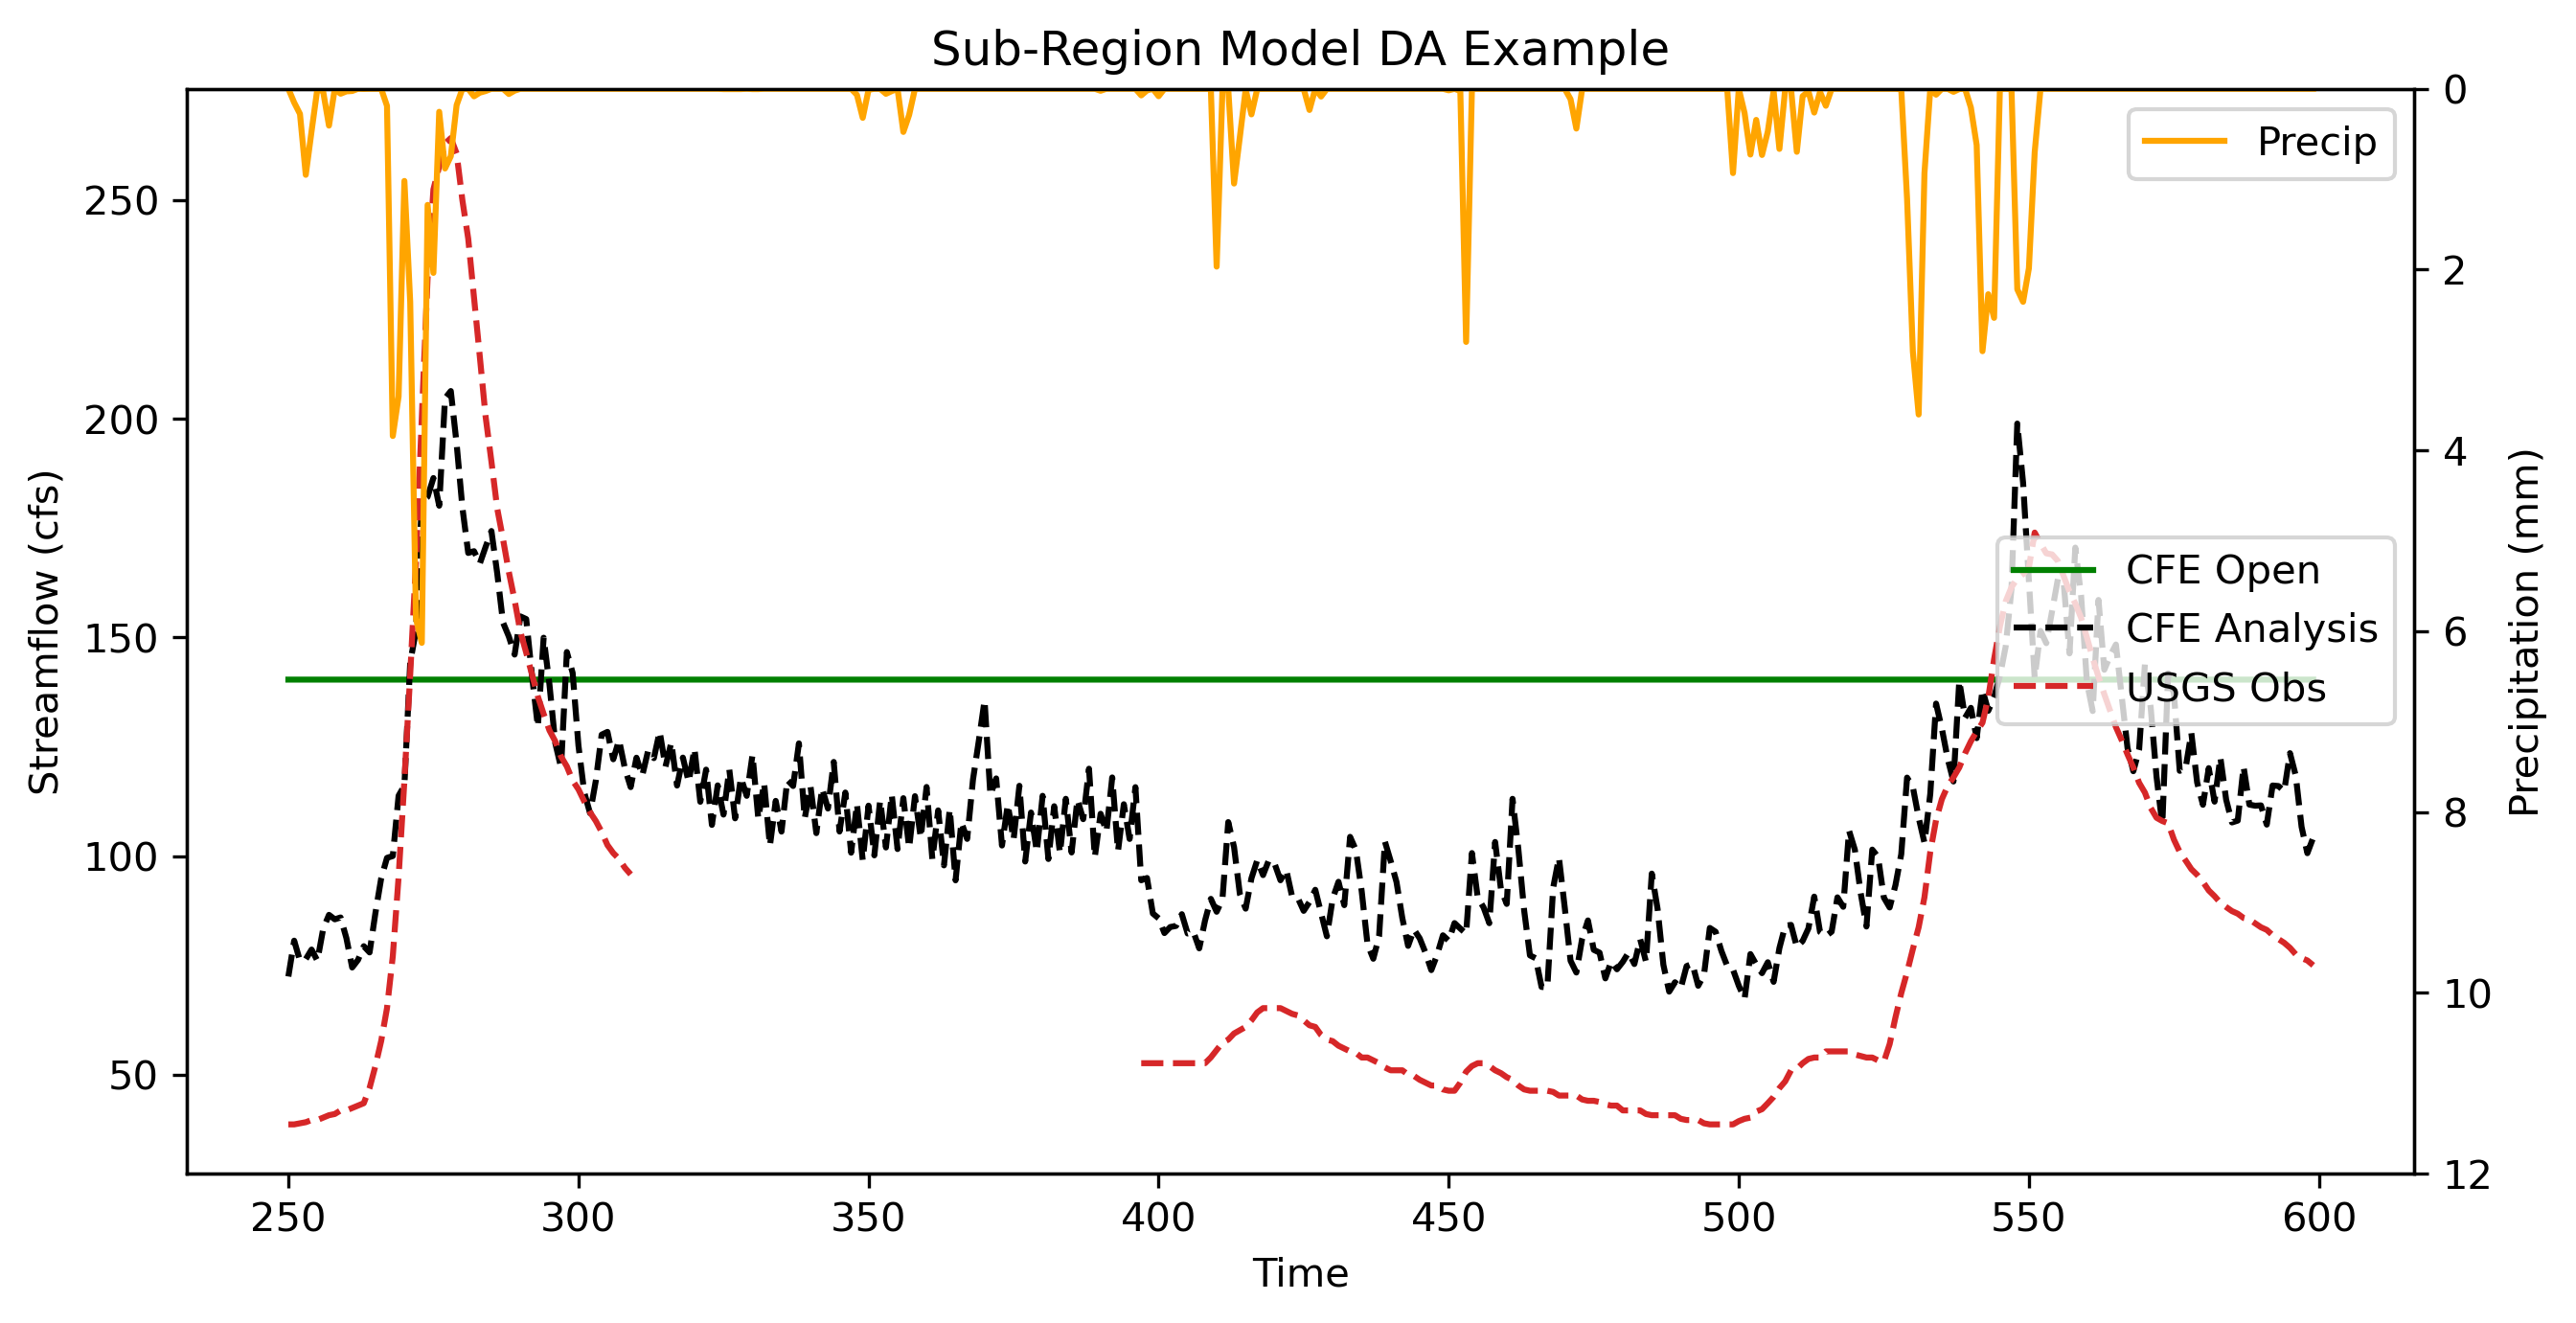

In [7]:
istart_plot=250
iend_plot=600
x = list(range(istart_plot, iend_plot))

fig, ax1 = plt.subplots(figsize = (10,5), dpi=300)

ax2 = ax1.twinx()

ax1.set_xlabel('Time')
ax1.set_ylabel('Streamflow (cfs)')
ax2.set_ylabel('Precipitation (mm)')
ax2.set_ylim(0,12,1)
ax2.invert_yaxis()


plt.title('Sub-Region Model DA Example')
#ax1.plot(x, cfePeturbed[istart_plot:iend_plot], color = 'tab:orange', label = 'CFE Peturbed')
ax1.plot(x, cfeOpen[istart_plot:iend_plot], color = 'green', label = 'CFE Open')
ax1.plot(x, cfeAnalysis[istart_plot:iend_plot], color = 'black', linestyle='dashed', label = 'CFE Analysis')
ax1.plot(x, obs[istart_plot:iend_plot], color = 'tab:red', linestyle='dashed', label = 'USGS Obs')
#ax1.plot(x, cfeEnKF[istart_plot:iend_plot], color = 'tab:blue', label = 'EnKF')
ax2.plot(df_forcing['APCP_surface'][istart_plot:iend_plot], color="orange", label = 'Precip')
#plt.ylabel('Streamflow (CFS)')
#plt.xlabel('Time')
ax1.legend(loc='center right')
ax2.legend(loc='upper right')
#plt.savefig("WorkingDA_7-19.png")

plt.show()


In [8]:
len(cfeOpen)

768

In [9]:
len(cfeAnalysis)

768

In [10]:
len(obs)

768

In [11]:
df=pd.DataFrame({"obs":obs,"cfeAnalysis":cfeAnalysis,"cfeOpen":cfeOpen})

In [12]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
# nse_open=he.evaluator(he.nse,np.array(obs),np.array(cfeOpen))
# nse_analysis=he.evaluator(he.nse,obs[istart_plot:iend_plot],cfeAnalysis[istart_plot:iend_plot])
# kge_open, r_open, alpha_open, beta_open = he.evaluator(he.kge, obs,cfeOpen)
# print(r_open[0])

In [14]:
# CFE open eval
nse_open=he.evaluator(he.nse,df["obs"],df["cfeOpen"])
pbias_open=he.evaluator(he.pbias,df["obs"],df["cfeOpen"])
kge_open, r_open, alpha_open, beta_open = he.evaluator(he.kge, df["obs"],df["cfeOpen"])
print("r_open=",r_open[0])
print("KGE_open=",kge_open[0])
print("NSE_open=", nse_open[0])
print("PBIAS_open=", pbias_open[0])

r_open= -0.14637456242691618
KGE_open= -7.795165491422972
NSE_open= -404.9815494899798
PBIAS_open= 52.218658318423735


In [15]:
# CFE Analysis
nse_analysis=he.evaluator(he.nse,df["obs"],df["cfeAnalysis"])
pbias_analysis=he.evaluator(he.pbias,df["obs"],df["cfeAnalysis"])
kge_analysis, r_analysis, alpha_analysis, beta_analysis = he.evaluator(he.kge, df["obs"],df["cfeAnalysis"])
print("r_analysis=",r_analysis[0])
print("KGE_analysis=",kge_analysis[0])
print("NSE_analysis=", nse_analysis[0])
print("PBIAS_analysis=", pbias_analysis[0])

r_analysis= 0.9307823411127877
KGE_analysis= 0.46292125919308147
NSE_analysis= -0.51135930166276
PBIAS_analysis= 30.890352728574026


In [16]:
print("mean_obs=",np.mean(df["obs"]))
print("STD_obs=",np.std(df["obs"]))
print("mean_open=",np.mean(df["cfeOpen"]))
print("STD_open=",np.std(df["cfeOpen"]))
print("mean_analysis=",np.mean(df["cfeAnalysis"]))
print("STD_analysis=",np.std(df["cfeAnalysis"]))


mean_obs= 66.93546270718221
STD_obs= 40.45261101684418
mean_open= 140.0870305259587
STD_open= 4.168444322807014
mean_analysis= 96.85400714649194
STD_analysis= 28.212235788672047
